In [20]:
import re
import pandas as pd

# Lee el archivo de texto
with open('results3.txt', 'r') as file:
    text = file.read()

# Define el patrón regex para extraer los datos
pattern = re.compile(
    r"Epoch \d+, Accuracy: (?P<accuracy>\d+\.\d+), Loss: (?P<loss>\d+\.\d+), Validation Accuracy: (?P<val_accuracy>\d+\.\d+), Validation Loss: (?P<val_loss>\d+\.\d+)"
)

# Encuentra todos los matches en el texto
matches = pattern.findall(text)

# Convierte los datos extraídos a un DataFrame
data = {
    "Accuracy": [float(match[0]) for match in matches],
    "Loss": [float(match[1]) for match in matches],
    "Validation Accuracy": [float(match[2]) for match in matches],
    "Validation Loss": [float(match[3]) for match in matches]
}

df = pd.DataFrame(data)


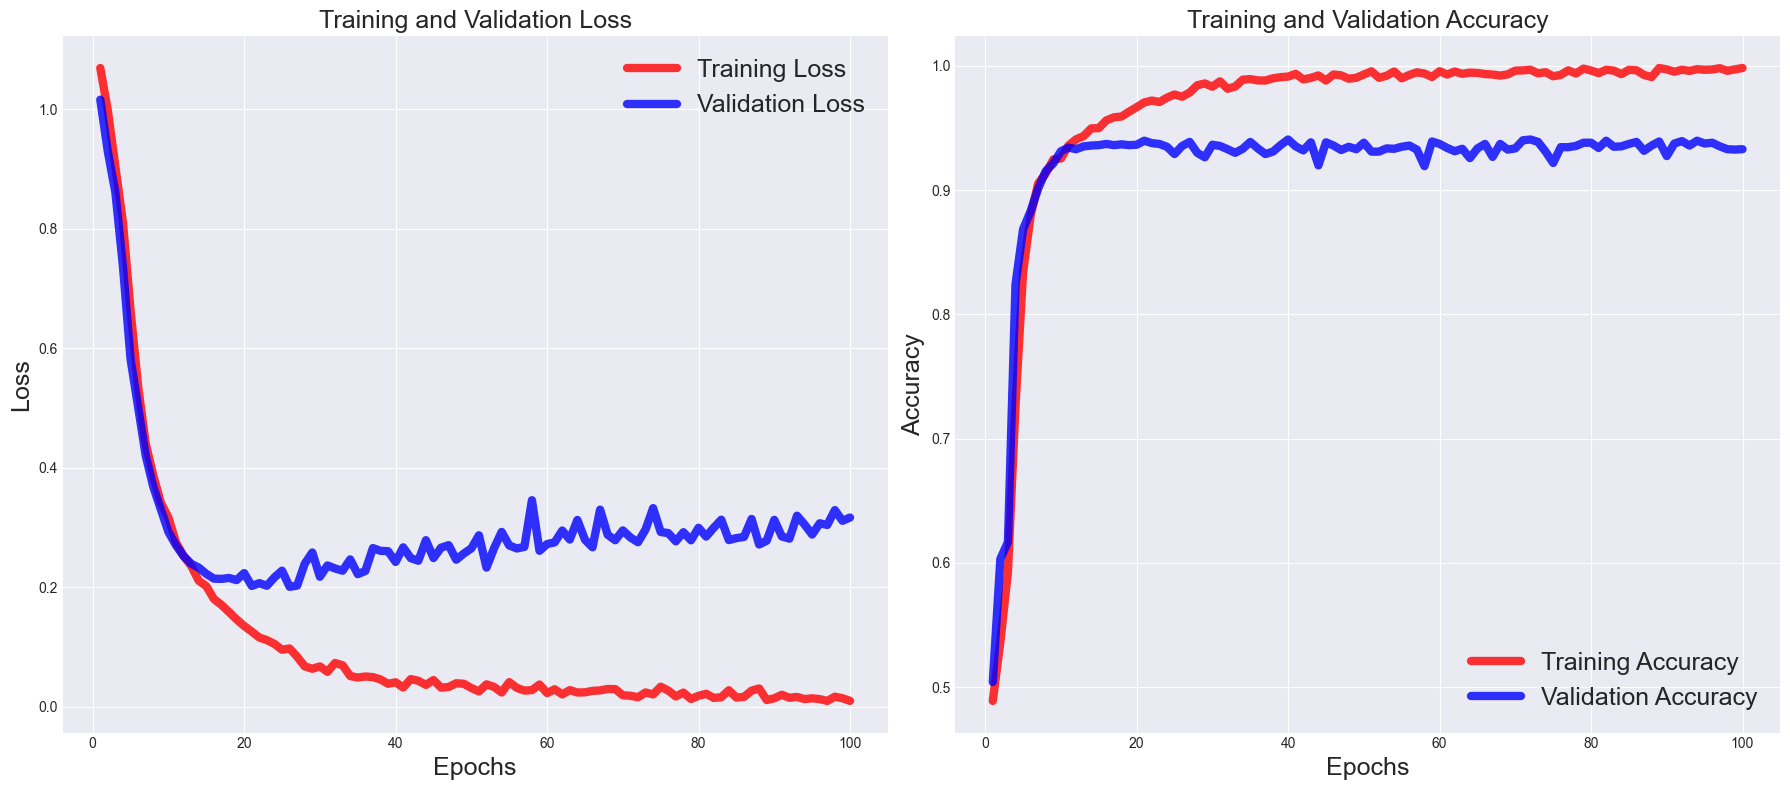

In [21]:
import matplotlib.pyplot as plt

# Configuración de estilo
lw = 6
s = 18  # Tamaño de los títulos, títulos de ejes y leyenda
a = 0.8
ct = "red"
ca = "blue"

# Crear una figura con dos subplots, uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de Pérdida
ax1.plot(df.index + 1, df['Loss'], label='Training Loss', linewidth=lw, color=ct, alpha=a)
ax1.plot(df.index + 1, df['Validation Loss'], label='Validation Loss', linewidth=lw, color=ca, alpha=a)
ax1.set_xlabel('Epochs', fontsize=s)
ax1.set_ylabel('Loss', fontsize=s)
ax1.set_title('Training and Validation Loss', fontsize=s)
ax1.legend(fontsize=s)

# Gráfico de Exactitud
ax2.plot(df.index + 1, df['Accuracy'], label='Training Accuracy', linewidth=lw, color=ct, alpha=a)
ax2.plot(df.index + 1, df['Validation Accuracy'], label='Validation Accuracy', linewidth=lw, color=ca, alpha=a)
ax2.set_xlabel('Epochs', fontsize=s)
ax2.set_ylabel('Accuracy', fontsize=s)
ax2.set_title('Training and Validation Accuracy', fontsize=s)
ax2.legend(fontsize=s)

# Ajustar el layout y guardar la imagen
plt.tight_layout()
plt.savefig('quantum_model_3classes.png')
plt.show()